<a href="https://colab.research.google.com/github/Mi-Lai/Data-Analytics/blob/main/Proyecto_Detecci%C3%B3n_de_Fraude_en_tarjetas_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto fin de curso Análisis de datos con Python**
# Detección de fraude en tarjetas de crédito
          Presenta
Equipo #39

*Analista: Mi-Lai Yamamoto Joo*

*Analista: Dafne Linette Badillo Campuzano*

El presente proyecto busca poner en practica lo aprendido en el curso de Análisis de datos con Python mediante un modelo para la detección de Fraude de Tarjetas de Crédito usando datos extraidos de Kanggle: Credit Card Fraud by DHANUSH NARAYANAN R.

Se analizarán paso a paso los siguientes puntos:
1. LOCACIÓN Y VARIABILIDAD
*  Promedio,Mediana,Media Truncada,Desviación estándar, Rango, Percentiles 25 y 75 (por lo menos), Rango intercuartil
* Valores tipicos y atipicos
2. DISTRIBUCIONES
*   Distribucion de datos: boxplot con rango intercuartilico
*   Histogramas con seaborn
*   Interpretacion de histogramas: asimetría y curtosis
3. EXPLORACIÓN DE VARIABLES CATEGÓRICAS Y ANÁLISIS MULTIVARIABLE
* Value_counts y moda para explorar la frecuencia de variables categóricas
*   Tablas de contingencia
* Múltiples niveles en columnas
*   Subplots
*   Boxplots y violinplots para explorar la distribución de variables numéricas segmentadas por una variable categórica
4. CORRELACIONES Y REGRESIÓN LINEAL SIMPLE
*   Explicar como aplicar el coeficiente de correlacion de pearson
*   Matrices de correlacion y graficas
*   Scatterplots con dos variables
*   Modelo con Regresion Lineal Simple
5. DISTRIBUCIONES MUESTRALES Y TÉCNICAS DE EVALUACIÓN DE MODELOS
*   Sesgo y muestreo aleatorio
*   Algoritmo bootstrap con errores estandares e intervalos de confianza
*   Separar info en datasets de entrenamiento y prueba
*   Validación cruzada
6. VISUALIZACIÓN DE DATOS AVANZADA
* Visualizaciones avanzadas con Matplotlib (títulos, etiquetas de datos, colores efectivos)
7. PRUEBAS A/B Y PROCESAMIENTO DE LENGUAJE NATURAL
*   Prueba A/B
*   nltk para análisis estadistico de lenguaje natural
*   graficas del análisis estadistico de lenguaje natural
8. INTRODUCCIÓN A MACHINE LEARNING: CLASIFICACIÓN NO SUPERVISADA Y
SUPERVISADA
*   Concepto de ML relacionado con nuestros datos e hipotesis
*   Agrupamiento
*   Clasificación
*   Entrenar Modelo de Regresión Logistica y evaluar su desempeño


In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
URL="https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data"
od.download(URL)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: milaiyamamoto
Your Kaggle Key: ··········


100%|██████████| 28.9M/28.9M [00:00<00:00, 72.1MB/s]


In [ ]:
import os
os.chdir("./credit-card-fraud")
os.listdir()

['card_transdata.csv']

In [ ]:
import pandas as pd
data='card_transdata.csv'
df=pd.read_csv(data)

Explicación de la característica:
* Distance_from_home: la distancia desde el hogar donde se realizó la transacción.
* Distance_from_last_transaction: la distancia desde la última transacción realizada.
* ratio_to_median_purchase_price: relación entre el precio de compra de la transacción y el precio de compra medio.
* repetir_retailer: ¿la transacción se realizó en el mismo minorista?
* used_chip - Es la transacción a través de chip (tarjeta de crédito).
* used_pin_number: ¿la transacción se realizó utilizando el número PIN?
* online_order: ¿Es la transacción un pedido en línea?
*Fraude: ¿Es la transacción fraudulenta?

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
df.shape

(1000000, 8)

In [ ]:
#limpiamos la base de datos
df.isna().sum()
#notamos que no hay valores nulos, por lo tanto nuestro dataset esta limpio

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**LOCACIÓN Y VARIABILIDAD**

In [ ]:
#calculamos valores de locación y variabilidad para variable de la distancia desde el hogar donde se realizó la transacción
print(f'Media: {df["distance_from_home"].mean()}')
print(f'Mediana: { df["distance_from_home"].median()}')
#eliminamos el 25% de los datos
print(f'Media_truncada: {stats.trim_mean(df["distance_from_home"], 0.25)}')   #observamos que la distancia entre la media truncada y la mediana es menor en comparación con la
#mediana y la media, lo que posiblemente indica presencia de valores atípicos

Media: 26.62879219257128
Mediana: 9.967760078697681
Media_truncada: 11.44296578876483


In [ ]:
#desviación estandar
print(f'Desviación_estandar: {df["distance_from_home"].std()}')
#Rango
print(f'Rango: {df["distance_from_home"].max() - df["distance_from_home"].min()}')
print(f'Cuantil_85: {df["distance_from_home"].quantile(0.85)}')
print(f'El 85% de los valores de la distancia del hogar a donde se realizó la transacciónas son menor o igual a 42.67 km')
#Percentiles
print(f'Valor mínimo: {df["distance_from_home"].min()}')
print(f'Percentil 10: {df["distance_from_home"].quantile(0.1)}')
print(f'Percentil 25: {df["distance_from_home"].quantile(0.25)}')
print(f'Percentil 50: {df["distance_from_home"].median()}')
print(f'Percentil 75: {df["distance_from_home"].quantile(0.75)}')
print(f'Percentil 90: {df["distance_from_home"].quantile(0.9)}')
print(f'Valor máximo: {df["distance_from_home"].max()}')
#Rango intercuantílico
print(f'Rango intercuantílico:{df["distance_from_home"].quantile(0.75) - df["distance_from_home"].quantile(0.25)}')

Desviación_estandar: 65.39078439904469
Rango: 10632.718797856036
Cuantil_85: 42.672316988539116
El 85% de los valores de la distancia del hogar a donde se realizó la transacciónas son menor o igual a 42.67 km
Valor mínimo: 0.0048743850667442
Percentil 10: 1.6549281059317562
Percentil 25: 3.878007992837444
Percentil 50: 9.967760078697681
Percentil 75: 25.743985056553438
Percentil 90: 60.26898008166988
Valor máximo: 10632.723672241103
Rango intercuantílico:21.865977063715995


Se observa que la mayoria de nuestros datos (90%) estan por debajo de los 61, por lo que tenemos valores atípicos muy grandes. El rango intercuantílico nos indica que los valores típicos de la distancia del hogar a donde se realizó la transacción, se encuentran en un rango de 21.87, lo cual es mucho menor al rango total de nuestros datos.

**DISTRIBUCIONES**

<Axes: xlabel='distance_from_home'>

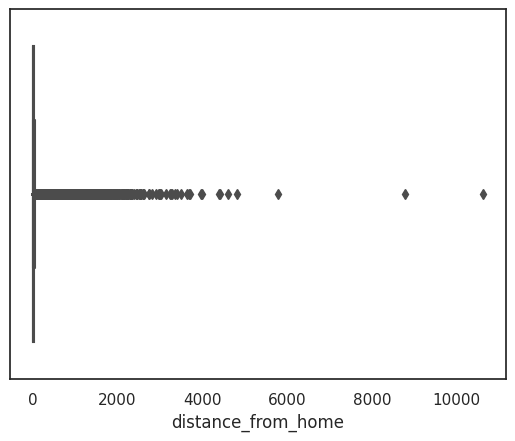

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#Generamos un boxplots para detectar la presencia de outliers
sns.set(style="white")
sns.boxplot(x=df['distance_from_home'])
#debido a la distribución de los datos, la grafica no se aprecia ver, pero si notamos una gran cantidad de valores atípicos

Text(0, 0.5, 'kilometros')

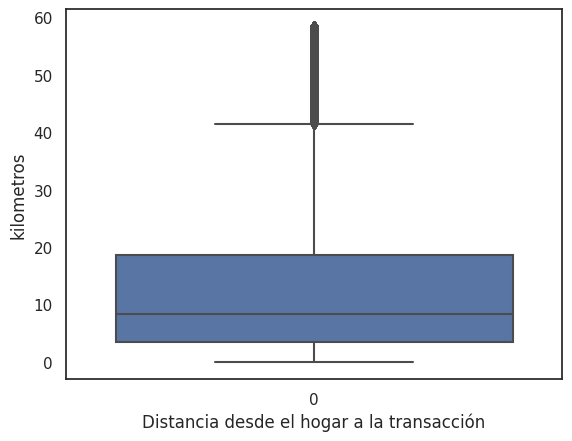

In [ ]:
#vamos a fltrar nuestros datos dejando de un lado los outliers
iqr = df['distance_from_home'].quantile(0.75) - df['distance_from_home'].quantile(0.25)
filtro_inferior = df['distance_from_home'] > df['distance_from_home'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['distance_from_home'] < df['distance_from_home'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df[filtro_inferior & filtro_superior]
sns.boxplot(df_filtrado['distance_from_home'])
plt.xlabel("Distancia desde el hogar a la transacción")
plt.ylabel("kilometros")

In [ ]:
#Tabla de frecuencias
segmentos= pd.cut(df['distance_from_home'], 20)
df['distance_from_home'].groupby(segmentos).count()

distance_from_home
(-10.628, 531.641]        997692
(531.641, 1063.277]         1888
(1063.277, 1594.913]         285
(1594.913, 2126.549]          73
(2126.549, 2658.185]          34
(2658.185, 3189.821]          10
(3189.821, 3721.456]           9
(3721.456, 4253.092]           2
(4253.092, 4784.728]           3
(4784.728, 5316.364]           1
(5316.364, 5848.0]             1
(5848.0, 6379.636]             0
(6379.636, 6911.272]           0
(6911.272, 7442.908]           0
(7442.908, 7974.544]           0
(7974.544, 8506.18]            0
(8506.18, 9037.816]            1
(9037.816, 9569.452]           0
(9569.452, 10101.088]          0
(10101.088, 10632.724]         1
Name: distance_from_home, dtype: int64

<Axes: xlabel='distance_from_home', ylabel='Count'>

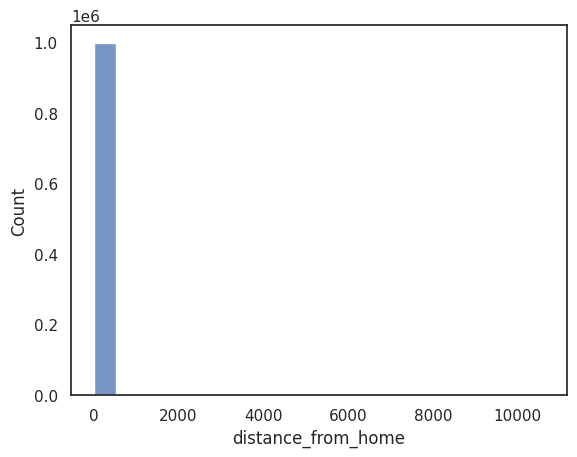

In [ ]:
sns.histplot(data=df['distance_from_home'],kde=False, bins=20)

La mayoria de nuestros datos (99%), se encuentran dentro del primer segmento por lo que usaremos los datos filtrados


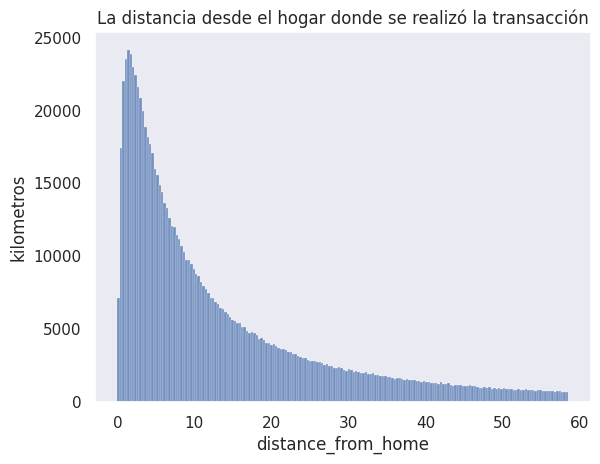

In [ ]:
#Ahora realizamos el histograma de nuestra variable, con los datos filtrados para una mejor visualización
dfh=df_filtrado['distance_from_home']
sns.set(style='dark')
ax=sns.histplot(data=dfh)
ax.set(title='La distancia desde el hogar donde se realizó la transacción', xlabel='distance_from_home', ylabel='kilometros');

In [ ]:
from scipy.stats import skew, kurtosis
print(f'Asimetria: {skew(dfh)}')
print(f'Curtosis: {kurtosis(dfh)}')

Asimetria: 1.4251263310000675
Curtosis: 1.3700814035812021


Nuestro valor de asimestria es positivo, es decir la cola de la derecha es más larga que la cola de la izquierda.Al igual que la curtosis, entonces nuestros datos estan muy dispersos.





**EXPLORACIÓN DE VARIABLES CATEGÓRICAS Y ANÁLISIS MULTIVARIABLE**

In [ ]:
#Utiliza value_count para explorar la frecuencia de variables categóricas
df['online_order'].value_counts()

1.0    650552
0.0    349448
Name: online_order, dtype: int64

In [ ]:
df['used_chip'].value_counts(),

(0.0    649601
 1.0    350399
 Name: used_chip, dtype: int64,)

In [ ]:
df['used_pin_number'].value_counts()

0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64

In [ ]:
df['repeat_retailer'].value_counts()


1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64

In [ ]:
df["fraud"].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

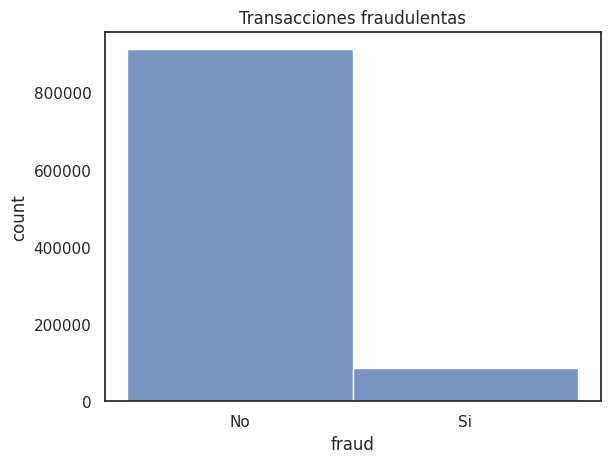

In [ ]:
#No fraude=0, Fraude=1
#Frecuencias de Fraude
# Reemplazar 0 por 'No' y 1 por 'Si' en la columna 'Fraude'
nuevos_valores = {0: 'No', 1: 'Si'}
fraude1 = df['fraud'].replace(nuevos_valores)
sns.set(style='white')
ax=sns.histplot(fraude1)
ax.set(title='Transacciones fraudulentas', xlabel='fraud', ylabel='count');

In [ ]:
#¿la transacción se realizó utilizando el número PIN? = df['used_pin_number']
# Reemplazar 0 por 'no_pin_number' y 1 por 'Pin_number' en la columna 'Fraude'
n_value = {0: 'no_pin_number', 1: 'Pin_number'}
df['used_pin_number'] = df['used_pin_number'].replace(n_value)

In [ ]:
Tabla_de_contingencia = pd.crosstab(fraude1, df['used_pin_number'])
print(f'La tabla muestra las transacciones que fueron fraude segun el uso del numero pin')
Tabla_de_contingencia

La tabla muestra las transacciones que fueron fraude segun el uso del numero pin


used_pin_number,Pin_number,no_pin_number
fraud,,
No,100335,812262
Si,273,87130


Múltiples niveles en columnas

In [ ]:
#Tabla que clasifica fraude o  o fraude, segun el uso del numero pin y si la transacción fue online
#online_order: ¿Es la transacción un pedido en línea?

In [ ]:
Multitab1= pd.crosstab(fraude1,[df['online_order'], df['used_pin_number']],margins=True, margins_name='total')
Multitab1

online_order           0.0                      1.0                  total
used_pin_number Pin_number no_pin_number Pin_number no_pin_number         
fraud                                                                     
No                   35198        309558      65137        502704   912597
Si                       1          4691        272         82439    87403
total                35199        314249      65409        585143  1000000

In [ ]:
Tabla_de_contingencia.loc(0)

Subplots en una gráfica de Matplotlib

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,no_pin_number,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,no_pin_number,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,no_pin_number,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,no_pin_number,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,no_pin_number,1.0,0.0


In [ ]:
by_online_order= df.groupby(level=0)[['distance_from_last_transaction', 'distance_from_home', 'ratio_to_median_purchase_price']].mean()
fraude= df.groupby(level=0)['fraud'].last()
merged = by_online_order.merge(fraude, left_index=True, right_index=True)
merged

,distance_from_last_transaction,distance_from_home,ratio_to_median_purchase_price,fraud
0,0.311140,57.877857,1.945940,0.0
1,0.175592,10.829943,1.294219,0.0
2,0.805153,5.091079,0.427715,0.0
3,5.600044,2.247564,0.362663,0.0
4,0.566486,44.190936,2.222767,0.0
...,...,...,...,...
999995,0.112651,2.207101,1.626798,0.0
999996,2.683904,19.872726,2.778303,0.0
999997,1.472687,2.914857,0.218075,0.0
999998,0.242023,4.258729,0.475822,0.0


[Text(0.5, 1.0, 'Distancia de transacciones desde casa'),
 Text(0.5, 0, 'fraud'),
 Text(0, 0.5, 'count')]

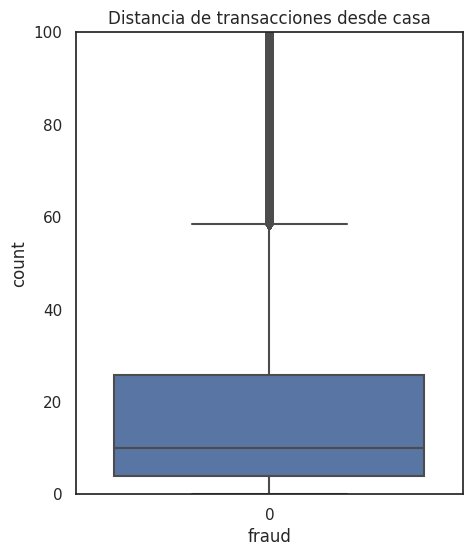

In [ ]:
plt.figure(figsize=(5, 6))
plt.ylim(0, 100)
ax=sns.boxplot(df['distance_from_home'])
ax.set(title='Distancia de transacciones desde casa', xlabel='fraud', ylabel='count')


Observamos que nuestros datos de las transacciones fraudulentas se encuentran dentro de los 100km de distancia del hogar,
el 50% de nuestros datos se concentran en el priemer cuartil tanto si hay fraude o no, y hay muchos outliers, lo que indica mucha variabilidad


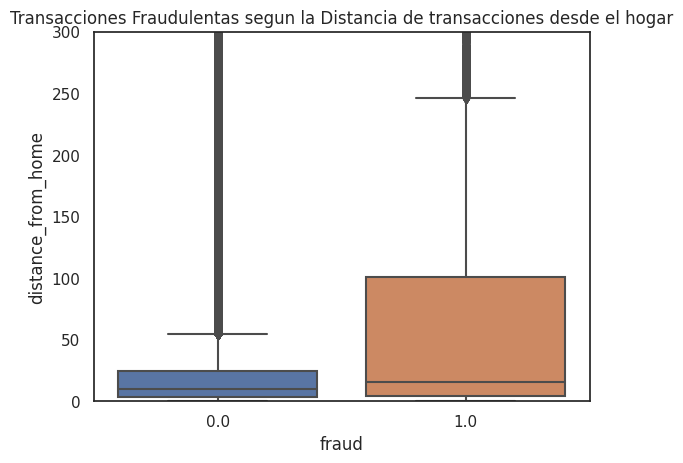

In [ ]:
plt.ylim(0, 300)
ax=sns.boxplot(data=merged, x='fraud', y='distance_from_home')
ax.set(title='Transacciones Fraudulentas segun la Distancia de transacciones desde el hogar', xlabel='fraud', ylabel='distance_from_home');
print(f'Observamos que nuestros datos de las transacciones fraudulentas se encuentran dentro de los 100km de distancia del hogar,')
print(f'el 50% de nuestros datos se concentran en el priemer cuartil tanto si hay fraude o no, y hay muchos outliers, lo que indica mucha variabilidad')

El violín esta muy ancho en el punto 100 por lo que los datos estan muy densos en esa región
Debido a los extremos del violin, notamos una gran variabilidad de los datos en esas regiones


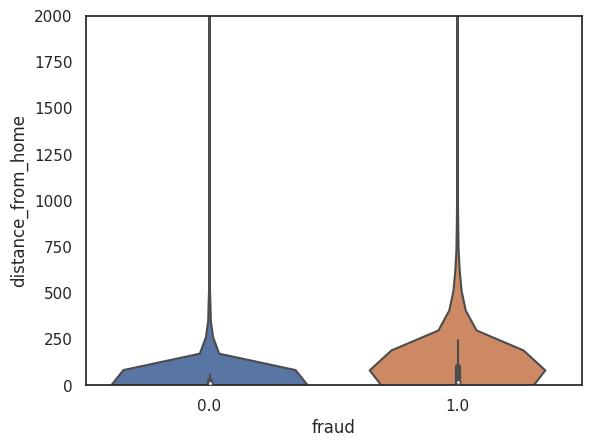

In [ ]:
plt.ylim(0, 2000)
sns.violinplot(data=merged, x='fraud', y='distance_from_home');

print(f'El violín esta muy ancho en el punto 100 por lo que los datos estan muy densos en esa región')

print(f'Debido a los extremos del violin, notamos una gran variabilidad de los datos en esas regiones')

**CORRELACIONES Y REGRESIÓN LINEAL SIMPLE**

In [ ]:
#Coeficiente de Correlación de Pearson: Correlación entre las primeras dos Series
Coef_Pearson = df['distance_from_home'].corr(df['distance_from_last_transaction'])
Coef_Pearson

0.0001928283347857507

In [ ]:
#matriz de correlación
df_filtered = df.drop(columns=['used_pin_number','repeat_retailer','used_chip','online_order','fraud'])
df_filtered.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
distance_from_home,1.000000,0.000193,-0.001374
distance_from_last_transaction,0.000193,1.000000,0.001013
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000


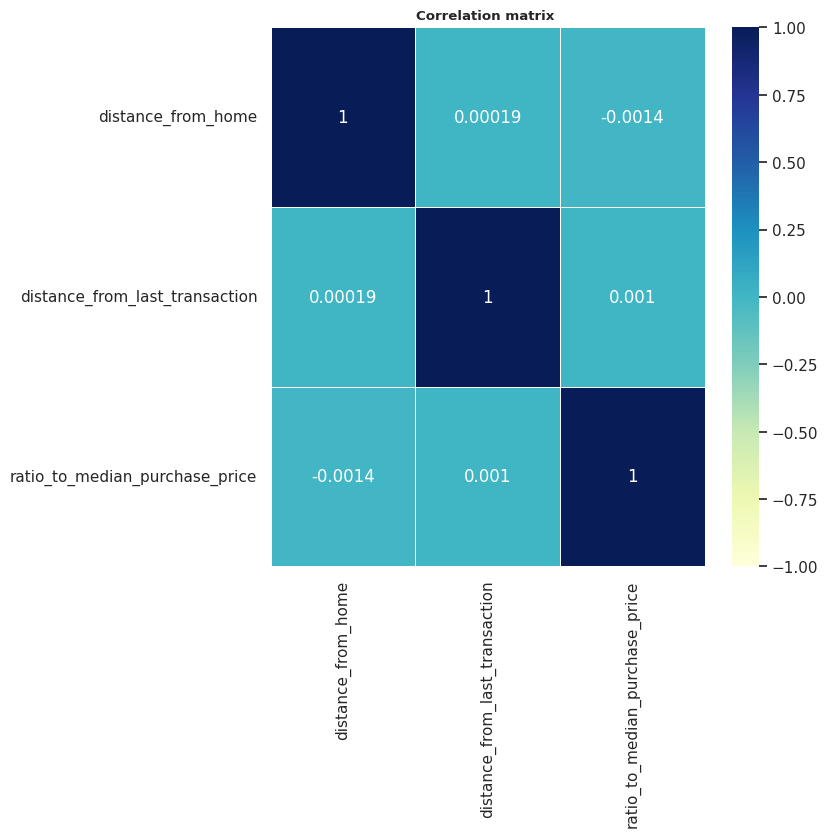

In [ ]:
#matrices de correlación y graficarlas usando mapas de calor
plt.figure(figsize=(7, 7))
ax = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)
sns.set(style="whitegrid", context="notebook", font_scale=0.8)
plt.title("Correlation matrix ", fontweight='bold')
plt.show()


Text(0, 0.5, 'distance_from_last_transaction')

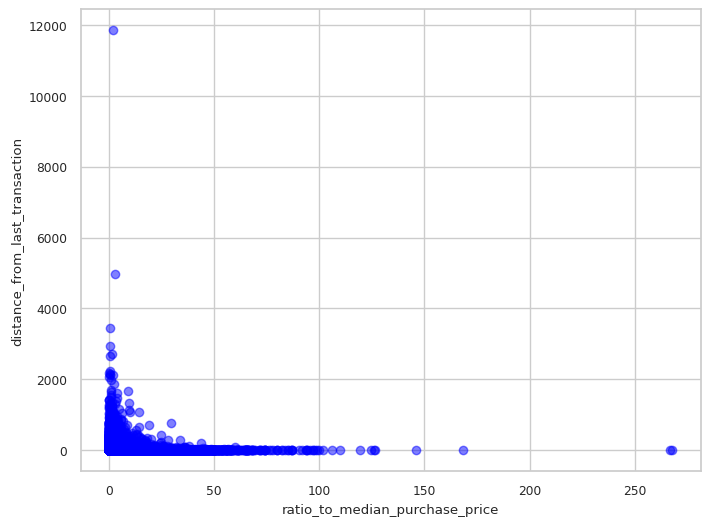

In [ ]:
#scatterplots con dos variables numéricas
plt.figure(figsize=(8, 6))
plt.scatter(df['ratio_to_median_purchase_price'], df['distance_from_last_transaction'], color='blue', alpha=0.5)
plt.xlabel("ratio_to_median_purchase_price")
plt.ylabel("distance_from_last_transaction")
#sns.scatterplot(df['ratio_to_median_purchase_price'], df['distance_from_last_transaction'])

In [ ]:
print(f'Como podemos observar no hay correlación entre la variable ratio_to_median_purchase_price y la distance_from_last_transaction')
df['ratio_to_median_purchase_price'].corr(df['distance_from_last_transaction'])

Como podemos observar no hay correlación entre la variable ratio_to_median_purchase_price y la distance_from_last_transaction


0.0010125255804664809

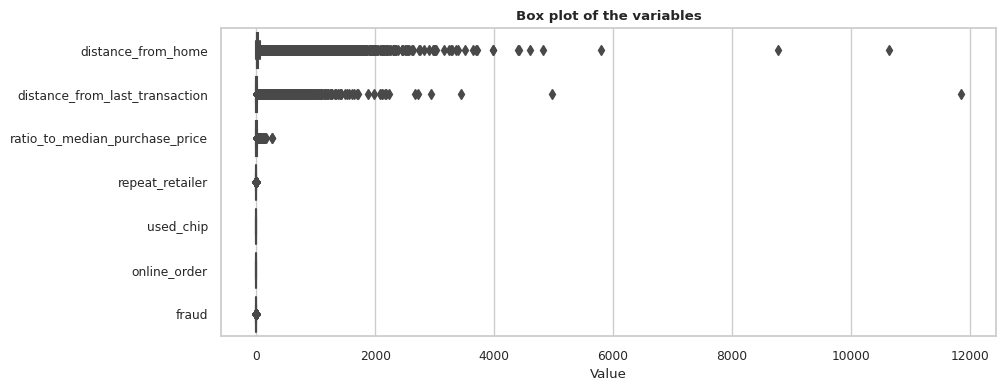

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, orient="h")
plt.title("Box plot of the variables", fontweight='bold')
plt.xlabel("Value")
plt.show()

In [ ]:
# Entrena un modelo de Regresión Lineal Simple
#vamos a fltrar nuestros datos dejando de un lado los outliers para nuestra regresión lineal
iqr = df.quantile(0.75) - df.quantile(0.25)
filtro_inferior = df> df.quantile(0.25) - (iqr * 1.5)
filtro_superior = df < df.quantile(0.75) + (iqr * 1.5)
datafil = df[filtro_inferior & filtro_superior]
Datos=datafil.drop(columns=['used_pin_number','repeat_retailer','used_chip','online_order','fraud'])
Datos.corr()

<ipython-input-66-1d8afa51fa44>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iqr = df.quantile(0.75) - df.quantile(0.25)
<ipython-input-66-1d8afa51fa44>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtro_inferior = df> df.quantile(0.25) - (iqr * 1.5)
<ipython-input-66-1d8afa51fa44>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filtro_inferior = df> df.quantile(0.25) - (iqr * 1.5)
<ipython-input-66-1d8afa51fa44>:5: FutureWarning: The default value of numeric

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
distance_from_home,1.000000,-0.002909,0.000212
distance_from_last_transaction,-0.002909,1.000000,-0.001002
ratio_to_median_purchase_price,0.000212,-0.001002,1.000000


Nuestra correlación sigue siendo nula, pero por fines practicos seguiremos adelante con nuestro modelo, aunque sabemos que no tendremos un buen modelo

In [ ]:
Datos.isna().sum()

distance_from_home                103631
distance_from_last_transaction    124367
ratio_to_median_purchase_price     84386
dtype: int64

In [ ]:
df1=Datos.dropna()

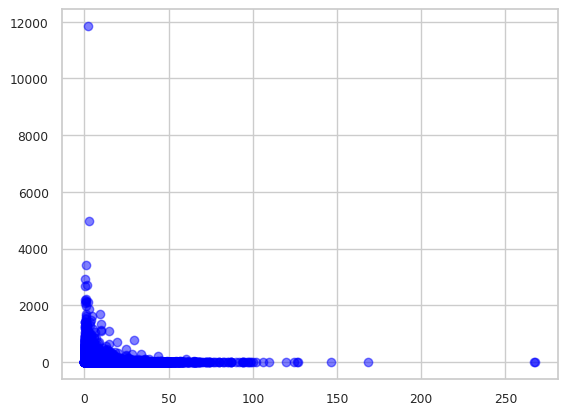

In [ ]:
df1 = df[df['distance_from_last_transaction'] < 1000]
df1 = df[df['ratio_to_median_purchase_price'] < 300]
plt.scatter(df1['ratio_to_median_purchase_price'], df1['distance_from_last_transaction'], color='blue', alpha=0.5)

In [ ]:
df1['ratio_to_median_purchase_price'].corr(df1['distance_from_last_transaction'])

0.0010125255804664809

In [ ]:
Datos['ratio_to_median_purchase_price'].dropna()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df1['ratio_to_median_purchase_price'].to_frame(),df1['distance_from_last_transaction'])

LinearRegression()

In [ ]:
y_predict = lr.predict(df1['ratio_to_median_purchase_price'].to_frame())

<Axes: xlabel='ratio_to_median_purchase_price', ylabel='distance_from_last_transaction'>

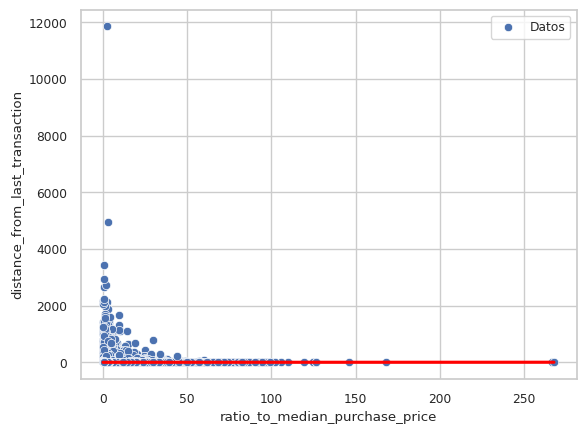

In [ ]:
sns.scatterplot(x=df1['ratio_to_median_purchase_price'], y=df1['distance_from_last_transaction'], label='Datos')
sns.regplot(x=df1['ratio_to_median_purchase_price'], y=df1['distance_from_last_transaction'], scatter=False, color='red', label='Línea de regresión')


In [ ]:
R2= lr.score(df1['ratio_to_median_purchase_price'].to_frame(), df1['distance_from_last_transaction'])
R2

1.0252080513417638e-06

In [ ]:
print(f'Como dijimos anteriormente nuestro modelo es pesimo, ya que el R2 es {R2}')
print(f'en este caso las variables no se correlacionan y el tema de nuestro proyecto es en relación a las transacciones fraudulentas, por lo que')
print(f'un modelo de regresión lineal , no es apto. Para ello realizaremos un modelo de regresión logística binaria más adelante')

Como dijimos anteriormente nuestro modelo es pesimo, ya que el R2 es 1.0252080513417638e-06
en este caso las variables no se correlacionan y el tema de nuestro proyecto es en relación a las transacciones fraudulentas, por lo que
un modelo de regresión lineal , no es apto. Para ello realizaremos un modelo de regresión logística binaria más adelante


**DISTRIBUCIONES MUESTRALES Y TÉCNICAS DE EVALUACIÓN DE MODELOS**


In [ ]:
#Sesgo y muestreo aleatorio
df.head()
#Tomamos una muestra sin reposición de la variable 	distance_from_home
df['distance_from_home'].sample(n=20, replace=False)  #Con reposición sería True

245470    48.180907
959813    16.446079
966785     0.810591
490986     0.807597
616037     2.962998
69477     13.504863
725379     9.217665
825684     3.715699
870758     3.155515
517679    23.268561
220782     5.535691
956309    16.777778
700213     4.420672
565689     2.616854
283980    40.054233
860825     8.421787
232683    26.833348
663848    11.675912
941819     8.367089
802024     6.125521
Name: distance_from_home, dtype: float64

In [ ]:
df['distance_from_home'].sample(frac=0.1, replace=True)

866795    89.665716
861606    14.739570
379145     3.538525
292974     1.061738
587203    18.187796
            ...    
83618     27.161185
154150    12.009764
816103     2.522621
117658     0.757065
446056     0.991539
Name: distance_from_home, Length: 100000, dtype: float64

Bootstraping

In [ ]:
#Algoritmo bootstrap con errores estandares e intervalos de confianza
distacia_del_hogar = df['distance_from_home']

means = []

for i in range(100_000):
    sample = distacia_del_hogar.sample(n=10000, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)


<ipython-input-89-b134403010b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False);


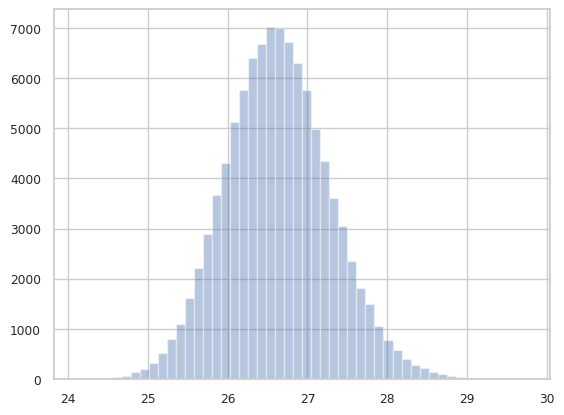

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);c

In [ ]:
serie_means.skew()

0.17858438107515023

In [ ]:
serie_means.kurtosis()

0.12045831943961094

In [ ]:
serie_means.mean()

26.632422004713373

In [ ]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 24.111365569873975
Valor máximo: 29.761667181648676
Rango: 5.650301611774701


In [ ]:
print(f'Error estandar: {serie_means.std()}   los valores tienden a estar más agrupados alrededor de la media.')

Error estandar: 0.6524217903148324   los valores tienden a estar más agrupados alrededor de la media.


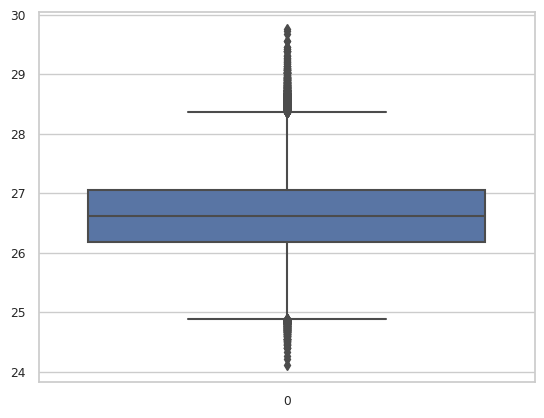

In [ ]:
sns.boxplot(serie_means);

Intervalos de confianza

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {distacia_del_hogar.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 25.405132150608953 < 26.62879219257128 < 27.96623136299929


In [ ]:
mean_of_intervals = ((distacia_del_hogar.mean() - limite_inferior) + (limite_superior -distacia_del_hogar.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {distacia_del_hogar.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 26.62879219257128 +/- 1.2805496061951693


<ipython-input-98-5881df1d38d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False)


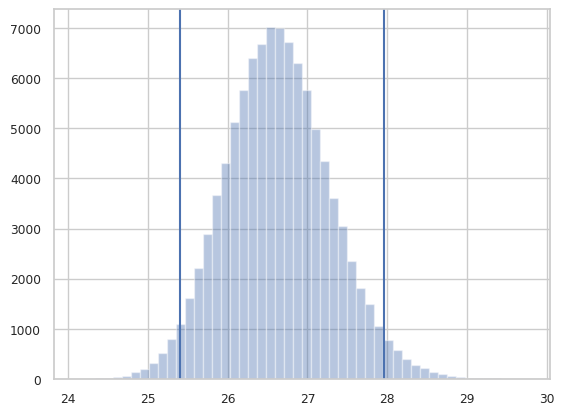

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

In [ ]:
df.head()

Validación Cruzada

UTILIZAR KFOLD

1. División del Conjunto de Datos: El conjunto de datos se divide en k subconjuntos (folds) aproximadamente del mismo tamaño.

2. Iteración: Se realiza el entrenamiento y la evaluación del modelo k veces. En cada iteración, un subconjunto se utiliza como conjunto de prueba, y los k-1 subconjuntos restantes se utilizan como conjunto de entrenamiento.

3. Evaluación del Modelo: Se evalúa el rendimiento del modelo en cada iteración utilizando métricas de evaluación como precisión, error cuadrático medio, etc.

4. Promedio de Resultados: Los resultados obtenidos en cada iteración se promedian para obtener una medida global del rendimiento del modelo.

Utilizaremos como caracteristica predictora a la columna 'used_pin_number' y a la columna 'fraud' como variable objetivo

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [ ]:
# Separar la columna 'objetivo' de las características predictoras
X = df.drop('used_pin_number', axis=1)  # Características predictoras
y = df['fraud']  # Variable objetivo

# Definir el número de divisiones para la validación cruzada (en este caso, 5 divisiones)
n_splits = 5

# Crear una instancia de KFold
kf = KFold(n_splits=n_splits);

# Iterar a través de las divisiones de KFold y entrenar tu modelo en cada iteración
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Datos de entrenamiento y prueba para características predictoras
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] ; # Datos de entrenamiento y prueba para variable objetivo

    # Aquí puedes instanciar tu modelo (por ejemplo, Regresión Logística)
    model = LogisticRegression()

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Evaluar el modelo con los datos de prueba
    accuracy = model.score(X_test, y_test);
    print(f'Precisión en la prueba: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión en la prueba: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión en la prueba: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión en la prueba: 0.99999


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión en la prueba: 1.0
Precisión en la prueba: 0.999995


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Como podemos ver la precisión de la prueba esta en un rango de 0.99> y = 1.0 lo que significa que todas las predicciones hechas por el modelo fueron correctas en el conjunto de datos de prueba. Y sugiere un rendimiento excelente del modelo en la mayoría de las instancias en el conjunto de datos de prueba.

In [ ]:
 print(f'Precisión en la prueba: {accuracy}')

Precisión en la prueba: 0.999995


PRUEBA A/B Y PROCESAMIENTO DE LENGUAJE NATURAL

Elegimos que la prueba A es: 'used_pin_number' vs. prueba B: 'online_order'. Mientras comparamos las métricas o el impacto de estas dos características en relación con tu variable objetivo 'fraud'

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df
## Datos de la prueba A ('used_pin_number')

grupo_A = df[df['used_pin_number'] == 1]['fraud']

# Datos de la prueba B ('online_order')
grupo_B = df[df['online_order'] == 1]['fraud']

# Comparación de las dos pruebas A/B usando un test t de Student independiente
t_stat, p_valor = ttest_ind(grupo_A, grupo_B, equal_var=False)
# Imprimir el resultado del test t de Student
print(f"Valor t: {round(t_stat,3)}")
print(f"Valor p: {round(p_valor, 3)}")

Valor t: -279.992
Valor p: 0.0


Dado que nuestro valor p = 0 < alfa=0.05 , en este caso sugiere que suficiente evidencia significativa entre las tasas de fraude en las pruebas A y B. Por lo que rechazamos la hipotesis nula, esto indica mayores transacciones fraudulentas usando pin_number.


Subplots

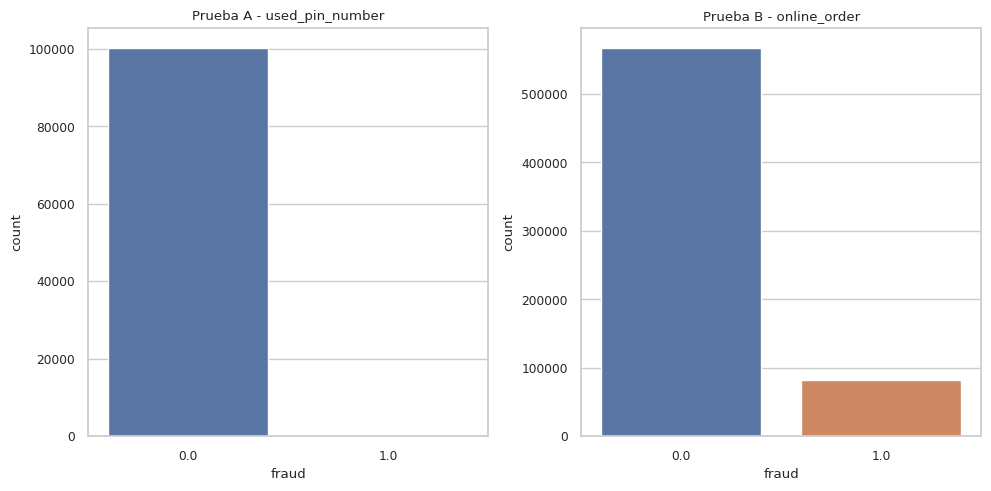

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico prueba A ('used_pin_number')
sns.countplot(x='fraud', data=df[df['used_pin_number'] == 1], ax=axes[0])
axes[0].set_title('Prueba A - used_pin_number')

# Gráfico prueba B ('online_order')
sns.countplot(x='fraud', data=df[df['online_order'] == 1], ax=axes[1])
axes[1].set_title('Prueba B - online_order')

plt.tight_layout()
plt.show()

NTKL

Debido a la naturaleza de nuestros datos y el tema del proyecto de detección de fraude en tarjetas de crédito, no es posible usar a nltk para hacer análisis estadístico de lenguaje natural.

###### GRAFICAS DE ANALISIS ESTADISTICO #####

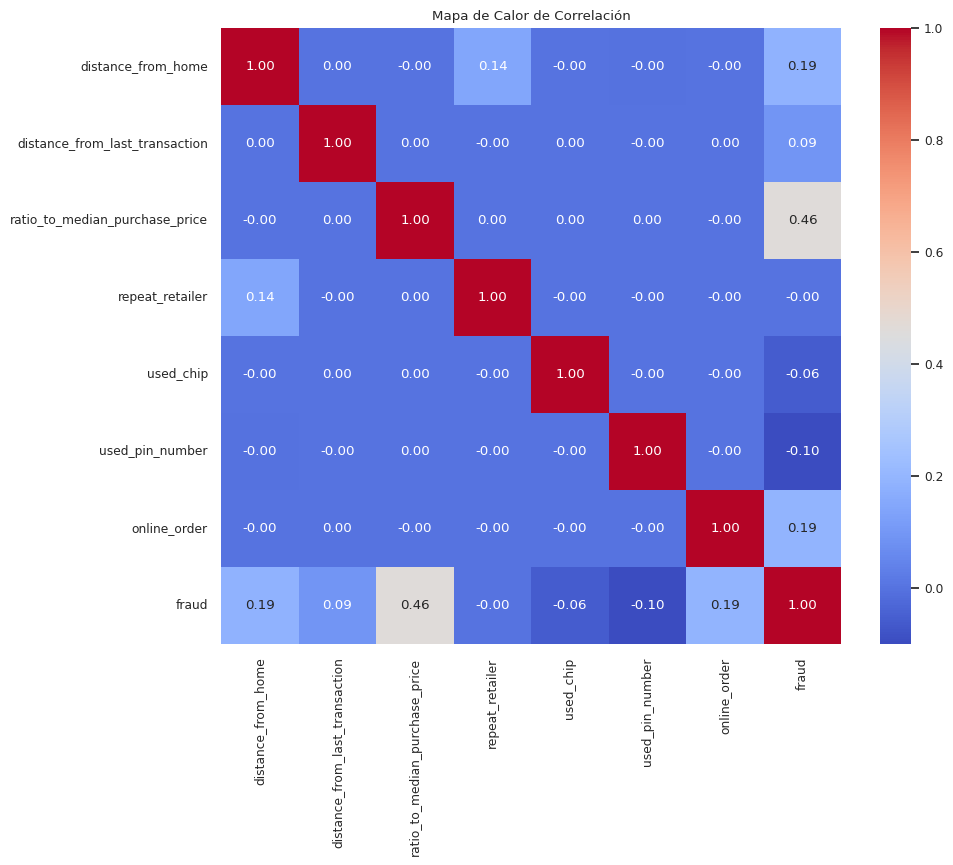

In [ ]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Definir el tamaño del gráfico

# Utilizar sns.heatmap para crear el mapa de calor
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# 'annot=True' muestra los valores en cada celda, 'cmap' define el esquema de color, 'fmt' establece el formato de los valores

plt.title('Mapa de Calor de Correlación')  # Establecer el título del gráfico
plt.show()  # Mostrar el mapa de calor

**MACHINE LEARNING:**
  
  CLASIFICACIÓN
  
  Para este caso de clasificación decidimos escoger el modelo de regresión logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('fraud', axis=1)
y = df['fraud']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de Regresión Logística
modelo = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo: {precision}")

# Otras métricas de evaluación
print(classification_report(y_test, predicciones))
print(confusion_matrix(y_test, predicciones))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión del modelo: 0.958585
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000

[[181250   1307]
 [  6976  10467]]


Nuestros resultados indican que la precisión del modelo tiene un 95.86%, lo que significa que ese procentaje de las predicciones realizadas por el modelo son correctas.
Para la clase 0, el modelo tiene una precisión del 96%, mientras que para la clase 1, tiene una precisión del 89% lo que significa que el 96% de las predicciones para la clase 0 son correctas y el 89% de las predicciones para la clase 1 son correctas.
En el caso de Recall tiene una tasa del 99% en la clase 0, mientras que en la clase 1 fue un recall del 60% de los casos reales de la clase 1 son correctos.
Para F1-score es de 0.98 en la clase 0 y en la clase 1 es de 0.72, relativamete se encuentran por encima de un promedio acercandose pero no demasiado a 1 que sería el mejor resultado esperado.
En Support, indica que hay 182557 muestras de la clase 0 y 17443 muestras de la clase 1 en el conjunto de pruebas.

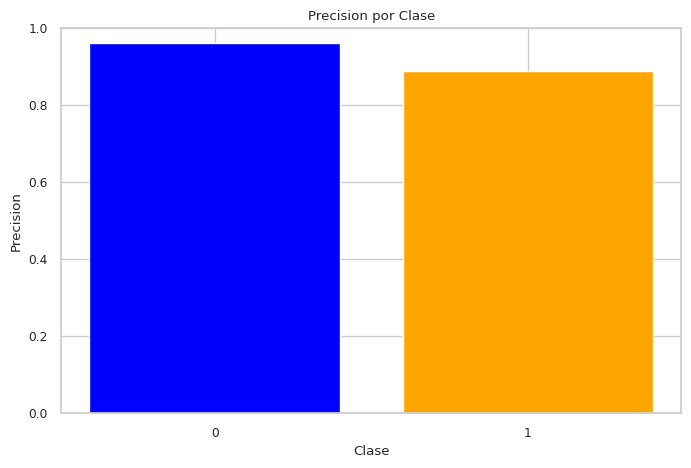

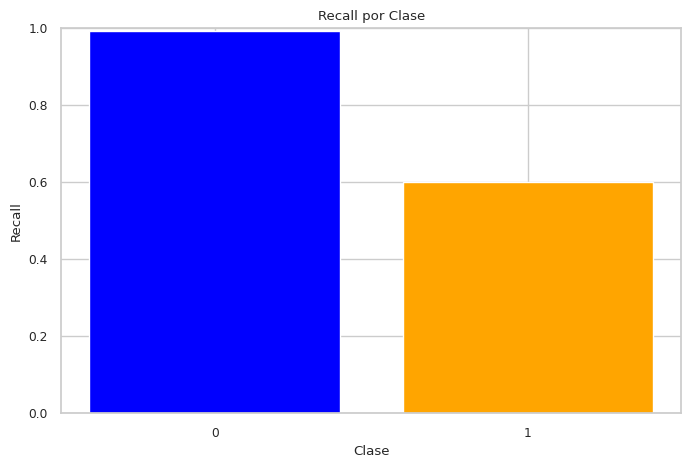

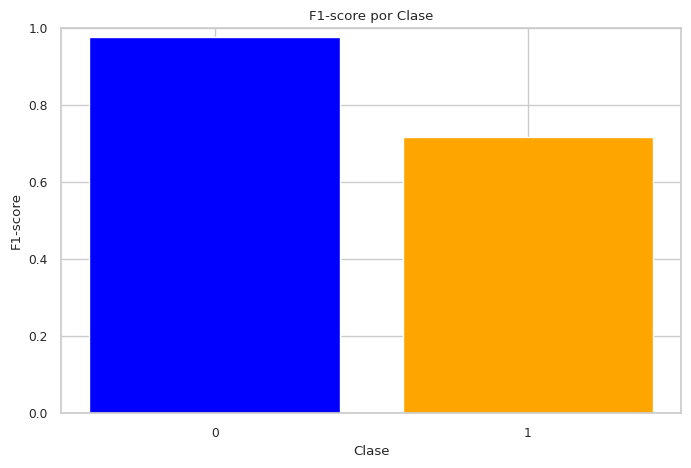

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Resultados de precision, recall, f1-score y support para cada clase
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predicciones)

# Clases
clases = [0, 1]

# Gráfico de barras para precision
plt.figure(figsize=(8, 5))
plt.bar(clases, precision, color=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Precision')
plt.title('Precision por Clase')
plt.xticks(clases)
plt.ylim(0, 1)
plt.show()

# Gráfico de barras para recall
plt.figure(figsize=(8, 5))
plt.bar(clases, recall, color=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Recall')
plt.title('Recall por Clase')
plt.xticks(clases)
plt.ylim(0, 1)
plt.show()

# Gráfico de barras para F1-score
plt.figure(figsize=(8, 5))
plt.bar(clases, f1_score, color=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('F1-score')
plt.title('F1-score por Clase')
plt.xticks(clases)
plt.ylim(0, 1)
plt.show()
